In [2]:
import sys
sys.path.append("../mypkg")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from utils.matrix import conju_grad
from tqdm import trange

In [4]:
def cholesky_inv(A):
    U = torch.linalg.cholesky(A)
    Ainv = torch.cholesky_inverse(U)
    return Ainv

In [25]:
errs = []
for i in trange(10):
    n = 500
    B = torch.randn(n, n);
    A = B.T @ B + 0.1*torch.eye(n);
    
    x = torch.randn(n);
    b = A @ x;
    
    Ainv1 = torch.inverse(A);
    Ainv2 = cholesky_inv(A);
    recI1 = A@Ainv1;
    recI2 = A@Ainv2;
    torch.norm(recI1-torch.eye(n)),  torch.norm(recI2-torch.eye(n))
    
    x0 = conju_grad(A, b, 10000, eps=1e-5);
    x1 = Ainv1 @ b;
    x2 = Ainv2 @ b;
    U = torch.linalg.cholesky(A);
    x3 = torch.cholesky_solve(b.reshape(-1, 1), U).reshape(-1);
    errs.append([torch.norm(x0-x).item(), torch.norm(x1-x).item(), torch.norm(x2-x).item(), torch.norm(x3-x).item()])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.25it/s]


Text(0.5, 1.0, 'Matrix size 500')

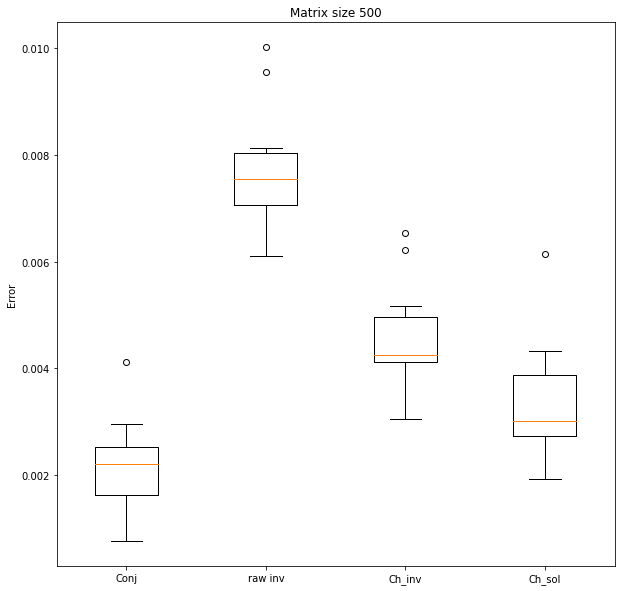

In [26]:
errs = np.array(errs);
plt.figure(figsize=[10, 10])
plt.boxplot(errs);
plt.xticks(np.arange(1, 5), ["Conj", "raw inv", "Ch_inv", "Ch_sol"]);
plt.ylabel("Error")
plt.title(f"Matrix size {n}")

In [16]:
%timeit Ainv2 @ b;
%timeit torch.cholesky_solve(b.reshape(-1, 1), U).reshape(-1);

21.5 µs ± 5.79 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
253 µs ± 413 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [110]:
x3.shape

torch.Size([500, 1])

In [30]:
raise TypeError(f"test {x2[0]}")

TypeError: test 0.7229570150375366